In [36]:
%matplotlib inline 
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import sys 
sys.path.append('../code_general/')
sys.path.append('../code_Boyle/')
import read_model_ID as model
import CRISPR_dCas9_binding_curve_Boyle as mastereq
reload(model);
reload(mastereq)


<module 'CRISPR_dCas9_binding_curve_Boyle' from '../code_Boyle/CRISPR_dCas9_binding_curve_Boyle.pyc'>

In [67]:
def calc_clv_curve(parameters, model_id, mismatch_positions, times ,guide_length):
    mat = mastereq.get_master_equation(parameters=parameters, 
                                        mismatch_positions=mismatch_positions, model_id=model_id, guide_length=guide_length)
    
    initial_condition = np.zeros(guide_length+2)
    initial_condition[0] = 1
    initial_condition.T
    
    probs_uncut = np.zeros(len(times))
    
    for i in range(len(times)):
        matrix_exponent = linalg.expm(+mat*times[i])
        probs = matrix_exponent.dot(initial_condition)
        probs_uncut[i] = np.sum(probs)
        
    return probs_uncut

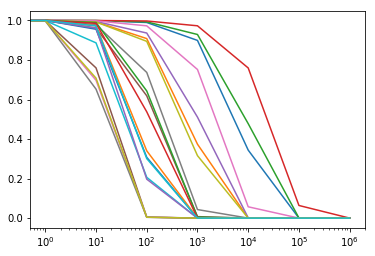

In [66]:
parameters = np.loadtxt('./example-params.txt')
model_id = 'Clv_init_limit_general_energies_v2'
times = [0,1,10,100,1000,10000,100000,1000000]
guide_length = 20

uncut_probs = np.zeros([len(times),20])
plt.figure()

for i in range(20):
    mismatch_positions = [i+1]
    uncut_probs[:,i] = calc_clv_curve(parameters, model_id, mismatch_positions, times, guide_length)
    plt.semilogx(times,uncut_probs[:,i])
    

